<a href="https://colab.research.google.com/github/grupo21dex/deliverable-1/blob/main/Projeto_final_Deliverable_1_grupo_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

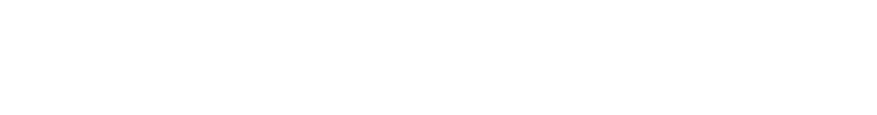

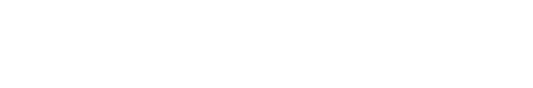

#***Grupo 21***

# Descrição das variaveis mais importantes





##1.   Documentos
*   ***kc_house_data.csv***: Arquivo original do projeto
*   ***df_cende.xlsx***: Arquivo criado para não ter necessidade de executar o código de criação do endereço






##2.   Data Frames
*    ***df***: Criado a partir do documento original.csv e depois atualizado conforme a necessidade




##3.   Colunas adicionadas
* ***address***: coluna com o endereço
* ***district***: Destrito
* ***resell***: vez que a casa foi vendida entre 02-05-2014 a 27-05-15



#Bibliotecas utilizadas




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import geopy

---

#**ATENÇÃO**: a parte 1 não precisa ser executada, está apenas para mostrar como chegamos ao novo arquivo que será usado na parte 2 em diante



#1 Arquivo do projeto: ***kc_house_data.csv***


1.1 Criação do dataframe ***df***







In [4]:
#df = pd.read_csv('kc_house_data.csv')
#df

Com a visualização dos dados vimos que não informava o endereço, utilizamos a ***lat*** e ***long*** para acrescentar o endereço

1.2 Localização do endereço usando as colunas ***lat*** (latitude) e ***long***(longitude)

 Adicionando a coluna ***address*** ao dataframe

In [5]:
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")
#address = list()
#for x in dados.index:
  #address.append(geolocator.reverse(str(df['lat'][x])+','+str(df['long'][x])))

1.3 Criando novo documento, pois a criação da coluna endereço foi demorada



In [6]:
#df.to_excel("enderecos.xlsx") 



---



#2 Utilizando o documento ***df_cende.xlsx***

2.1 Atualizando o dataframe ***df***

In [7]:
df = pd.read_excel('df_cende.xlsx')
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,address
0,0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,"10012, 61st Avenue South, Rainier Beach, Seatt..."
1,1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,"837, Northeast 127th Street, Northgate, Seattl..."
2,2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,"15109, 81st Avenue Northeast, Moorlands, Kenmo..."
3,3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,"9236, Fauntleroy Way Southwest, Fauntleroy, Se..."
4,4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,"923, 221st Avenue Northeast, Sammamish, King C..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,"927, North 97th Street, Licton Springs, Greenw..."
21609,21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,"2211, Southwest 103rd Place, White Center, Sea..."
21610,21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,"902, 26th Avenue South, Leschi, Seattle, King ..."
21611,21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,"2136, Northwest Boulder Way Drive, Talus, Issa..."


##2.2 Adicionando novas colunas ao dataframe
2.2.1 Adicionando as colunas ***number, street, district, city, county, state,number2, country, x e y*** tiradas da separação da coluna endereço

In [8]:
df[['number','street','district','city','county', 'state','number2','country','x','y']] = df['address'].str.split(',', expand=True)

2.2.2 Adicionando colunas ***price/lot*** que representa o preço por area do terreno 

In [9]:
df['price/lot'] = df['price'] / df['sqft_lot']

2.2.3 Adicionando a coluna ***area/living*** que representa o preço pela area habitável

In [10]:
df['price/living'] = df['price'] / df['sqft_living']

2.2.4 Adicionando a coluna ***resell*** que representa a vez que a casa foi vendida

In [11]:
unico = list()
repetido = list()
for x in df['id']:
  unico.append(x)
  repetido.append(unico.count(x))
df['resell'] = repetido

2.2.5 Adicionando coluna ***Mês da Venda*** e ***Ano da Venda*** e viualização do dataframe

In [12]:
df['date'] = df['date'].astype(np.datetime64)
df['Ano da Venda'] = df['date'].dt.year
df['Mês da Venda'] = df['date'].dt.month
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,state,number2,country,x,y,price/lot,price/living,resell,Ano da Venda,Mês da Venda
0,0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,...,Washington,98178,United States,None,None,39.274336,188.050847,1,2014,10
1,1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,...,Washington,98125,United States,None,None,74.288870,209.338521,1,2014,12
2,2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,...,Washington,98028,United States,None,None,18.000000,233.766234,1,2015,2
3,3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,...,Washington,98136,United States,None,None,120.800000,308.163265,1,2014,12
4,4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,...,98074,United States,None,None,None,63.118812,303.571429,1,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,...,King County,Washington,98103,United States,None,318.302387,235.294118,1,2014,5
21609,21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,...,Washington,98146,United States,None,None,68.811285,173.160173,1,2015,2
21610,21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,...,Washington,98144,United States,None,None,297.852593,394.216667,1,2014,6
21611,21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,...,Washington,98027,United States,None,None,167.504188,250.000000,1,2015,1


---

#3 Verificando os dados

3.1 Verificando os tipos de dados que temos

In [13]:
print(df.dtypes)

Unnamed: 0                int64
id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
address                  object
number                   object
street                   object
district                 object
city                     object
county                   object
state                    object
number2                  object
country                  object
x       

3.2 Verificando a quantidade de valores nulos

In [14]:
df.isnull().sum()

Unnamed: 0           0
id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
address              0
number               0
street               0
district             0
city                 2
county              38
state              210
number2            863
country           7677
x                18034
y                21563
price/lot            0
price/living         0
resell               0
Ano da Venda         0
Mês da Venda         0
dtype: int64

3.3 Verificando quantidade de dados

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     21613 non-null  int64         
 1   id             21613 non-null  int64         
 2   date           21613 non-null  datetime64[ns]
 3   price          21613 non-null  int64         
 4   bedrooms       21613 non-null  int64         
 5   bathrooms      21613 non-null  float64       
 6   sqft_living    21613 non-null  int64         
 7   sqft_lot       21613 non-null  int64         
 8   floors         21613 non-null  float64       
 9   waterfront     21613 non-null  int64         
 10  view           21613 non-null  int64         
 11  condition      21613 non-null  int64         
 12  grade          21613 non-null  int64         
 13  sqft_above     21613 non-null  int64         
 14  sqft_basement  21613 non-null  int64         
 15  yr_built       2161

---

#4 Remoção de dados desnecessários 

4.1 Identificando outlier

4.1.1 Funções ***limite_outiliers*** que determina os outliers e ***excluir_outiliers*** que excluem os outlier



In [16]:
def limite_outiliers(atributo):
  q1= atributo.quantile(0.25) # primeiro quartil
  q3= atributo.quantile(0.75) # segundo quartil
  amplitude = q3 - q1
  return (q1 - (1.5 * amplitude)), (q3 + (1.5 * amplitude)) # retorna uma tupla com os valores:  limite inferior e limite superior

def excluir_outiliers(df, nome_coluna):
  qtd_linha = df.shape[0]
  lim_inf, lim_sup = limite_outiliers(df[nome_coluna])
  df= df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
  linhas_excluidas = qtd_linha - df.shape[0]
  return df, linhas_excluidas

4.1.2 Usando a função ***limite_outliers*** para verificar os valores outliers para a coluna ***price***

In [17]:
print(limite_outiliers(df['price']))

(-162625.0, 1129575.0)


4.1.3 Funções ***diagrama_caixa***, ***histograma***, ***grafico_barra***, que criam graficos, ao utilizar em uma coluna

In [18]:
def diagrama_caixa(coluna):
  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.set_size_inches(15,5)
  sns.boxplot(x=coluna, ax=ax1,showmeans=True)
  ax2.set_xlim(limite_outiliers(coluna))
  sns.boxplot(x=coluna, ax=ax2,showmeans=True)

def histograma(coluna):
  plt.figure(figsize=(15,5))
  sns.distplot(coluna, hist= True)

def grafico_barra(coluna):
  plt.figure(figsize=(15,10))
  ax = sns.barplot(x=coluna.value_counts().index , y=coluna.value_counts())
  ax.set_xlim(limite_outiliers(coluna))

4.1.3.1 Gráficos mostrando os preços dos imóveis usando a coluna ***price***

In [19]:
'''diagrama_caixa(df['price'])
histograma(df['price'])
'''

"diagrama_caixa(df['price'])\nhistograma(df['price'])\n"

4.1.3.2 Removendo outliers 

In [20]:
df , linhas_excluidas = excluir_outiliers(df, 'price')
print(f'Linhas removidas: {linhas_excluidas}')

Linhas removidas: 1146


4.1.3.3 Exibindo o gráfico com os dados sem os outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


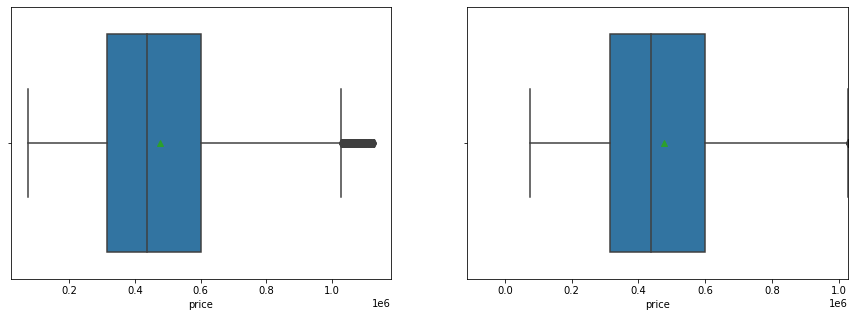

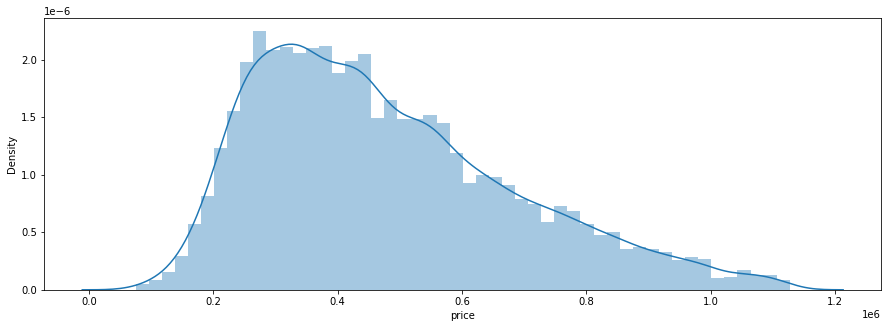

In [21]:
diagrama_caixa(df['price'])
histograma(df['price'])

4.2 Removendo linhas

4.2.1Verificando quantas vezes os imoveis foram vendidos

In [22]:
df['resell'] = df['resell'].astype(int)
df['resell'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    20297
2      169
3        1
Name: resell, dtype: int64

4.2.2 Localizando pelo 'id' o imóvel que foi vendido a terceira vez

In [23]:
df[df['resell']==3]['id']

17604    795000620
Name: id, dtype: int64

4.2.2.1 verificamos que somente um imóvel teve a terceira venda resolvemos remover para tornar mais facil a manipulação

4.2.2.2 Removendo a linha ***17604*** que representa a terceira venda

In [24]:
df = df.drop([17604],axis = 0)

4.2 Removendo colunas

4.2.1 Remover as colunas ***city, county, state,number2, country, x e y***. 
pois não usaremos seus dados e contem muitos valores nulos.

In [25]:
df = df.drop(['city', 'county', 'state','number2', 'country', 'x', 'y'], axis =1)

4.2.2 Removendo a coluna ***address***
foi utilizada para criar outras colunas e visualização do dataframe

In [26]:
df = df.drop(['address'], axis = 1)
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda
0,0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,...,1340,5650,10012,61st Avenue South,Rainier Beach,39.274336,188.050847,1,2014,10
1,1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,...,1690,7639,837,Northeast 127th Street,Northgate,74.288870,209.338521,1,2014,12
2,2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,...,2720,8062,15109,81st Avenue Northeast,Moorlands,18.000000,233.766234,1,2015,2
3,3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,...,1360,5000,9236,Fauntleroy Way Southwest,Fauntleroy,120.800000,308.163265,1,2014,12
4,4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,...,1800,7503,923,221st Avenue Northeast,Sammamish,63.118812,303.571429,1,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,...,1530,1509,927,North 97th Street,Licton Springs,318.302387,235.294118,1,2014,5
21609,21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,...,1830,7200,2211,Southwest 103rd Place,White Center,68.811285,173.160173,1,2015,2
21610,21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,...,1020,2007,902,26th Avenue South,Leschi,297.852593,394.216667,1,2014,6
21611,21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,...,1410,1287,2136,Northwest Boulder Way Drive,Talus,167.504188,250.000000,1,2015,1


---

#5 Verificando o lucro das casas que foram vendidas mais de uma vez

5.1 Renomeando colunas ***date*** e ***price*** para primeira venda e segunda venda, salvaremos em um novo dataframe (***df_lucro***) para utilizarmos para algumas analises

5.1.1 Criando 2 dataframes (***df_imoveisv1 e df_imoveisv2***) que mostram a primeira venda e a segunda venda respectivamente

In [27]:
df_imoveisv1 = df[df['resell'] == 1].copy()
df_imoveisv1 = df_imoveisv1[['id','date','price', 'resell']]
df_imoveisv1.rename(columns={'date': 'Date_1ªvenda'}, inplace=True) 
df_imoveisv1.rename(columns={'price': 'price_1ªvenda'}, inplace=True) 

df_imoveisv2 = df[df['resell'] == 2].copy()
df_imoveisv2 = df_imoveisv2[['id','date','price', 'resell']]
df_imoveisv2.rename(columns={'date': 'Date_2ªvenda'}, inplace=True) 
df_imoveisv2.rename(columns={'price': 'price_2ªvenda'}, inplace=True)

5.1.1 Juntando ***df_imoveisv1 e df_imoveisv2*** para a visualização do todo e fazer algumas analises 

In [28]:
df_imoveis1e2 = df_imoveisv1[['id','Date_1ªvenda','price_1ªvenda']].merge(df_imoveisv2[['id','Date_2ªvenda','price_2ªvenda']], on='id')
df_imoveis1e2['Lucro'] = df_imoveis1e2['price_2ªvenda'] - df_imoveis1e2['price_1ªvenda']
display(df_imoveis1e2.sort_values(by=['Lucro']))

,id,Date_1ªvenda,price_1ªvenda,Date_2ªvenda,price_2ªvenda,Lucro
114,7167000040,2014-08-13,740000,2015-03-05,700000,-40000
39,2726049071,2014-12-11,510000,2015-04-08,489950,-20050
87,2767603612,2014-05-12,500000,2015-01-13,489000,-11000
6,8682262400,2014-07-18,430000,2015-05-13,419950,-10050
132,2619920170,2014-10-01,772500,2014-12-19,765000,-7500
...,...,...,...,...,...,...
78,2568300045,2014-06-25,305000,2015-03-19,649950,344950
73,4443800385,2014-08-18,410000,2015-05-06,778100,368100
24,7409700215,2014-06-06,550000,2015-03-13,921500,371500
66,7977201065,2014-11-04,350000,2015-03-05,740000,390000


5.1.2 Crianda o dataframe ***df_lucro*** para visualização 

In [29]:
df_lucro = df.join(df_imoveis1e2[['Lucro']], how = 'left', lsuffix='left', rsuffix='right' ).copy()
df_lucro

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
0,0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,...,5650,10012,61st Avenue South,Rainier Beach,39.274336,188.050847,1,2014,10,270000.0
1,1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,...,7639,837,Northeast 127th Street,Northgate,74.288870,209.338521,1,2014,12,8500.0
2,2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,...,8062,15109,81st Avenue Northeast,Moorlands,18.000000,233.766234,1,2015,2,74900.0
3,3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,...,5000,9236,Fauntleroy Way Southwest,Fauntleroy,120.800000,308.163265,1,2014,12,215000.0
4,4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,...,7503,923,221st Avenue Northeast,Sammamish,63.118812,303.571429,1,2015,2,278000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,...,1509,927,North 97th Street,Licton Springs,318.302387,235.294118,1,2014,5,NaN
21609,21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,...,7200,2211,Southwest 103rd Place,White Center,68.811285,173.160173,1,2015,2,NaN
21610,21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,...,2007,902,26th Avenue South,Leschi,297.852593,394.216667,1,2014,6,NaN
21611,21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,...,1287,2136,Northwest Boulder Way Drive,Talus,167.504188,250.000000,1,2015,1,NaN


5.2 Data frame ***df_lucro*** com ordem decrescente, usando os valores do lucro como métrica, Usado para verificar os maiores lucros

In [30]:
display(df_lucro.sort_values(by=['Lucro'],ascending=False))

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
161,161,3756500060,2015-03-09,438000,3,1.75,1780,9660,1.0,0,...,9660,13024,111th Avenue Northeast,Juanita,45.341615,246.067416,1,2015,3,529950.0
66,66,3394100030,2014-09-09,975000,4,2.50,2720,11049,2.0,0,...,11049,111th Avenue Southeast,Bellevue,King County,88.243280,358.455882,1,2014,9,390000.0
24,24,3814700200,2014-11-20,329000,3,2.25,2450,6500,2.0,0,...,6865,12715,Southeast 254th Court,White Horse Crossing,50.615385,134.285714,1,2014,11,371500.0
73,73,5416510140,2014-07-10,360000,4,2.50,2380,5000,2.0,0,...,5000,22840,Southeast 269th Street,Rock Creek Meadows,72.000000,151.260504,1,2014,7,368100.0
78,78,6300000287,2014-06-09,410000,3,1.00,1410,5060,1.0,0,...,5693,10710,Interlake Avenue North,Haller Lake,81.027668,290.780142,1,2014,6,344950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,...,1509,927,North 97th Street,Licton Springs,318.302387,235.294118,1,2014,5,NaN
21609,21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,...,7200,2211,Southwest 103rd Place,White Center,68.811285,173.160173,1,2015,2,NaN
21610,21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,...,2007,902,26th Avenue South,Leschi,297.852593,394.216667,1,2014,6,NaN
21611,21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,...,1287,2136,Northwest Boulder Way Drive,Talus,167.504188,250.000000,1,2015,1,NaN


5.3 Data frame df_lucro em ordem crescente, Usado para verificarmos os maiores prejuizos

In [31]:
display(df_lucro.sort_values(by=['Lucro'],ascending=True))

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
114,114,8961960160,2014-10-28,480000,4,2.50,3230,16171,2.0,0,...,8517,1119,R Street Northwest,West Hill,29.682765,148.606811,1,2014,10,-40000.0
39,39,2078500320,2014-06-20,605000,4,2.50,2620,7553,2.0,0,...,11884,8113,120th Place Southeast,Newcastle,80.100622,230.916031,1,2014,6,-20050.0
87,87,3342103156,2014-06-18,461000,3,3.25,2770,6278,2.0,0,...,7349,3419,Meadow Avenue North,Kennydale,73.431029,166.425993,1,2014,6,-11000.0
6,6,1321400060,2014-06-27,257500,3,2.25,1715,6819,2.0,0,...,6819,533,South 330th Place,Federal Way,37.762135,150.145773,1,2014,6,-10050.0
132,132,1243100136,2014-06-12,784000,3,3.50,3950,111078,1.5,0,...,88500,King County,Washington,98052-2866,7.058103,198.481013,1,2014,6,-7500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,...,1509,927,North 97th Street,Licton Springs,318.302387,235.294118,1,2014,5,NaN
21609,21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,...,7200,2211,Southwest 103rd Place,White Center,68.811285,173.160173,1,2015,2,NaN
21610,21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,...,2007,902,26th Avenue South,Leschi,297.852593,394.216667,1,2014,6,NaN
21611,21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,...,1287,2136,Northwest Boulder Way Drive,Talus,167.504188,250.000000,1,2015,1,NaN


#6 verificando as vendas por ano

6.1 Ano de 2014

In [32]:
df[df['Ano da Venda']==2014]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda
0,0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,...,1340,5650,10012,61st Avenue South,Rainier Beach,39.274336,188.050847,1,2014,10
1,1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,...,1690,7639,837,Northeast 127th Street,Northgate,74.288870,209.338521,1,2014,12
3,3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,...,1360,5000,9236,Fauntleroy Way Southwest,Fauntleroy,120.800000,308.163265,1,2014,12
6,6,1321400060,2014-06-27,257500,3,2.25,1715,6819,2.0,0,...,2238,6819,533,South 330th Place,Federal Way,37.762135,150.145773,1,2014,6
11,11,9212900260,2014-05-27,468000,2,1.00,1160,6000,1.0,0,...,1330,6000,3169,Northeast 85th Street,Wedgwood,78.000000,403.448276,1,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,21603,7852140040,2014-08-25,507250,3,2.50,2270,5536,2.0,0,...,2270,5731,6843,Elderberry Avenue Southeast,Snoqualmie,91.627529,223.458150,1,2014,8
21605,21605,3448900210,2014-10-14,610685,4,2.50,2520,6023,2.0,0,...,2520,6023,3920,Northeast 24th Court,Glencoe,101.392163,242.335317,1,2014,10
21608,21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,...,1530,1509,927,North 97th Street,Licton Springs,318.302387,235.294118,1,2014,5
21610,21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,...,1020,2007,902,26th Avenue South,Leschi,297.852593,394.216667,1,2014,6


6.1.1 Gráfico de barras mostrando quantidade de vendas por mês

Text(0, 0.5, 'Count')

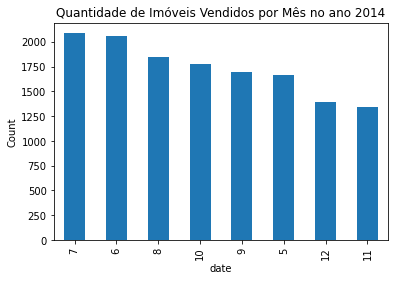

In [33]:
df['Ano da Venda']==2014
df[df['Ano da Venda']==2014]['Mês da Venda'].value_counts().plot(kind='bar')
plt.title('Quantidade de Imóveis Vendidos por Mês no ano 2014')
plt.xlabel('date')
plt.ylabel('Count')

6.2 Ano de 20015

In [34]:
df[df['Ano da Venda']==2015]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda
2,2,5631500400,2015-02-25,180000,2,1.0,770,10000,1.0,0,...,2720,8062,15109,81st Avenue Northeast,Moorlands,18.000000,233.766234,1,2015,2
4,4,1954400510,2015-02-18,510000,3,2.0,1680,8080,1.0,0,...,1800,7503,923,221st Avenue Northeast,Sammamish,63.118812,303.571429,1,2015,2
7,7,2008000270,2015-01-15,291850,3,1.5,1060,9711,1.0,0,...,1650,9711,21421,14th Avenue South,Des Moines Creek,30.053548,275.330189,1,2015,1
8,8,2414600126,2015-04-15,229500,3,1.0,1780,7470,1.0,0,...,1780,8113,216,Southwest 102nd Street,White Center,30.722892,128.932584,1,2015,4
9,9,3793500160,2015-03-12,323000,3,2.5,1890,6560,2.0,0,...,2390,7570,26007,232nd Place Southeast,Katesridge,49.237805,170.899471,1,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,21604,9834201367,2015-01-26,429000,3,2.0,1490,1126,3.0,0,...,1400,1230,3602,South Charlestown Street,Mount Baker,380.994671,287.919463,1,2015,1
21606,21606,7936000429,2015-03-26,1007500,4,3.5,3510,7200,2.0,0,...,2050,6200,5408,Beach Drive Southwest,West Seattle,139.930556,287.037037,1,2015,3
21607,21607,2997800021,2015-02-19,475000,3,2.5,1310,1294,2.0,0,...,1330,1265,3000,60th Avenue Southwest,Alki,367.078825,362.595420,1,2015,2
21609,21609,6600060120,2015-02-23,400000,4,2.5,2310,5813,2.0,0,...,1830,7200,2211,Southwest 103rd Place,White Center,68.811285,173.160173,1,2015,2


6.2.1 Gráfico de barras mostrando vendas por mes

Text(0, 0.5, 'Count')

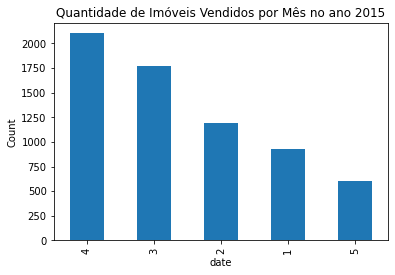

In [35]:
df[df['Ano da Venda']==2015]['Mês da Venda'].value_counts().plot(kind='bar')
plt.title('Quantidade de Imóveis Vendidos por Mês no ano 2015')
plt.xlabel('date')
plt.ylabel('Count')

6.13 Gráfico de barra com a quantidade de venda nos meses

Text(0, 0.5, 'Count')

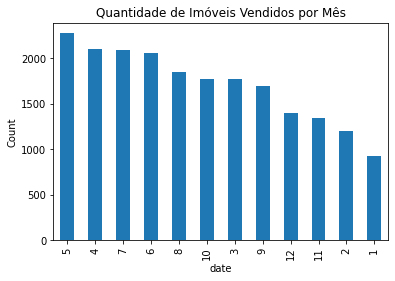

In [36]:
df['Mês da Venda'].value_counts().plot(kind='bar')
plt.title('Quantidade de Imóveis Vendidos por Mês')
plt.xlabel('date')
plt.ylabel('Count')

#7 Verificando a correlação

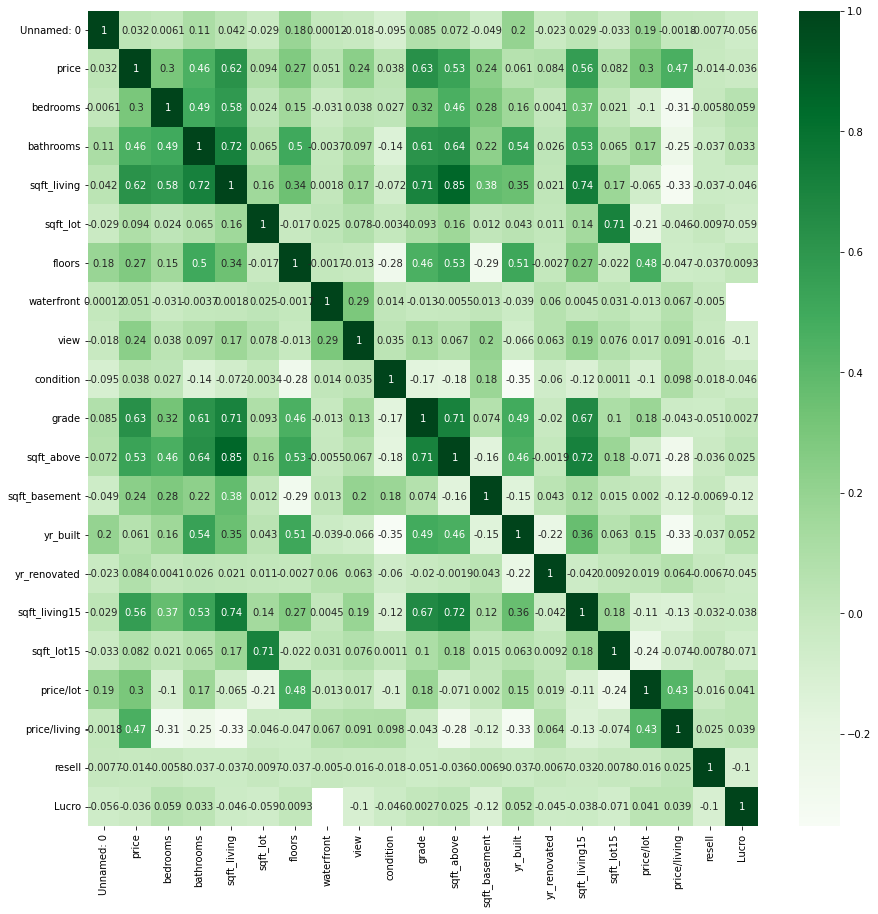

In [37]:
plt.figure(figsize = (15,15))
sns.heatmap(df_lucro.drop(['id','zipcode','lat','long','Ano da Venda','Mês da Venda'],axis = 1).corr(),  annot=True, cmap='Greens')

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
Unnamed: 0,1.000000,0.019965,0.003193,0.038711,0.048406,0.069800,0.049687,0.092517,NaN,-0.093060,...,-0.080738,0.127051,0.124805,0.058011,0.038061,-0.083241,NaN,-0.072608,0.073317,-0.044430
id,0.019965,1.000000,0.233009,0.036211,0.081635,0.143711,0.025081,0.058933,NaN,0.051537,...,0.110465,0.188405,0.103062,0.020931,0.161552,0.121892,NaN,0.007827,-0.018320,0.080478
price,0.003193,0.233009,1.000000,0.267926,0.425886,0.573636,0.058630,0.333930,NaN,0.130023,...,0.613783,0.084905,0.482789,0.054789,0.623979,0.547987,NaN,0.045564,-0.069328,0.426486
bedrooms,0.038711,0.036211,0.267926,1.000000,0.434926,0.589359,0.049397,0.201269,NaN,0.086415,...,0.128469,0.070850,0.208748,0.051976,0.028138,-0.305440,NaN,0.142306,-0.185110,0.093044
bathrooms,0.048406,0.081635,0.425886,0.434926,1.000000,0.747680,0.115617,0.548989,NaN,0.181780,...,0.124378,0.284485,0.514230,0.126885,0.295250,-0.254468,NaN,0.014352,-0.041850,-0.097072
sqft_living,0.069800,0.143711,0.573636,0.589359,0.747680,1.000000,0.211301,0.455815,NaN,0.117933,...,0.242632,0.310165,0.637463,0.204922,0.183193,-0.315553,NaN,-0.006673,-0.057648,0.003151
sqft_lot,0.049687,0.025081,0.058630,0.049397,0.115617,0.211301,1.000000,0.040180,NaN,-0.026746,...,-0.134073,0.220564,0.317507,0.968378,-0.279544,-0.096378,NaN,0.065736,-0.048552,-0.159404
floors,0.092517,0.058933,0.333930,0.201269,0.548989,0.455815,0.040180,1.000000,NaN,0.277888,...,0.045031,0.227981,0.346922,0.036578,0.479634,-0.080229,NaN,-0.058800,0.026808,-0.157890
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,-0.093060,0.051537,0.130023,0.086415,0.181780,0.117933,-0.026746,0.277888,NaN,1.000000,...,0.090715,0.002255,0.177803,-0.017348,0.245972,0.009994,NaN,-0.040062,0.051819,-0.097842


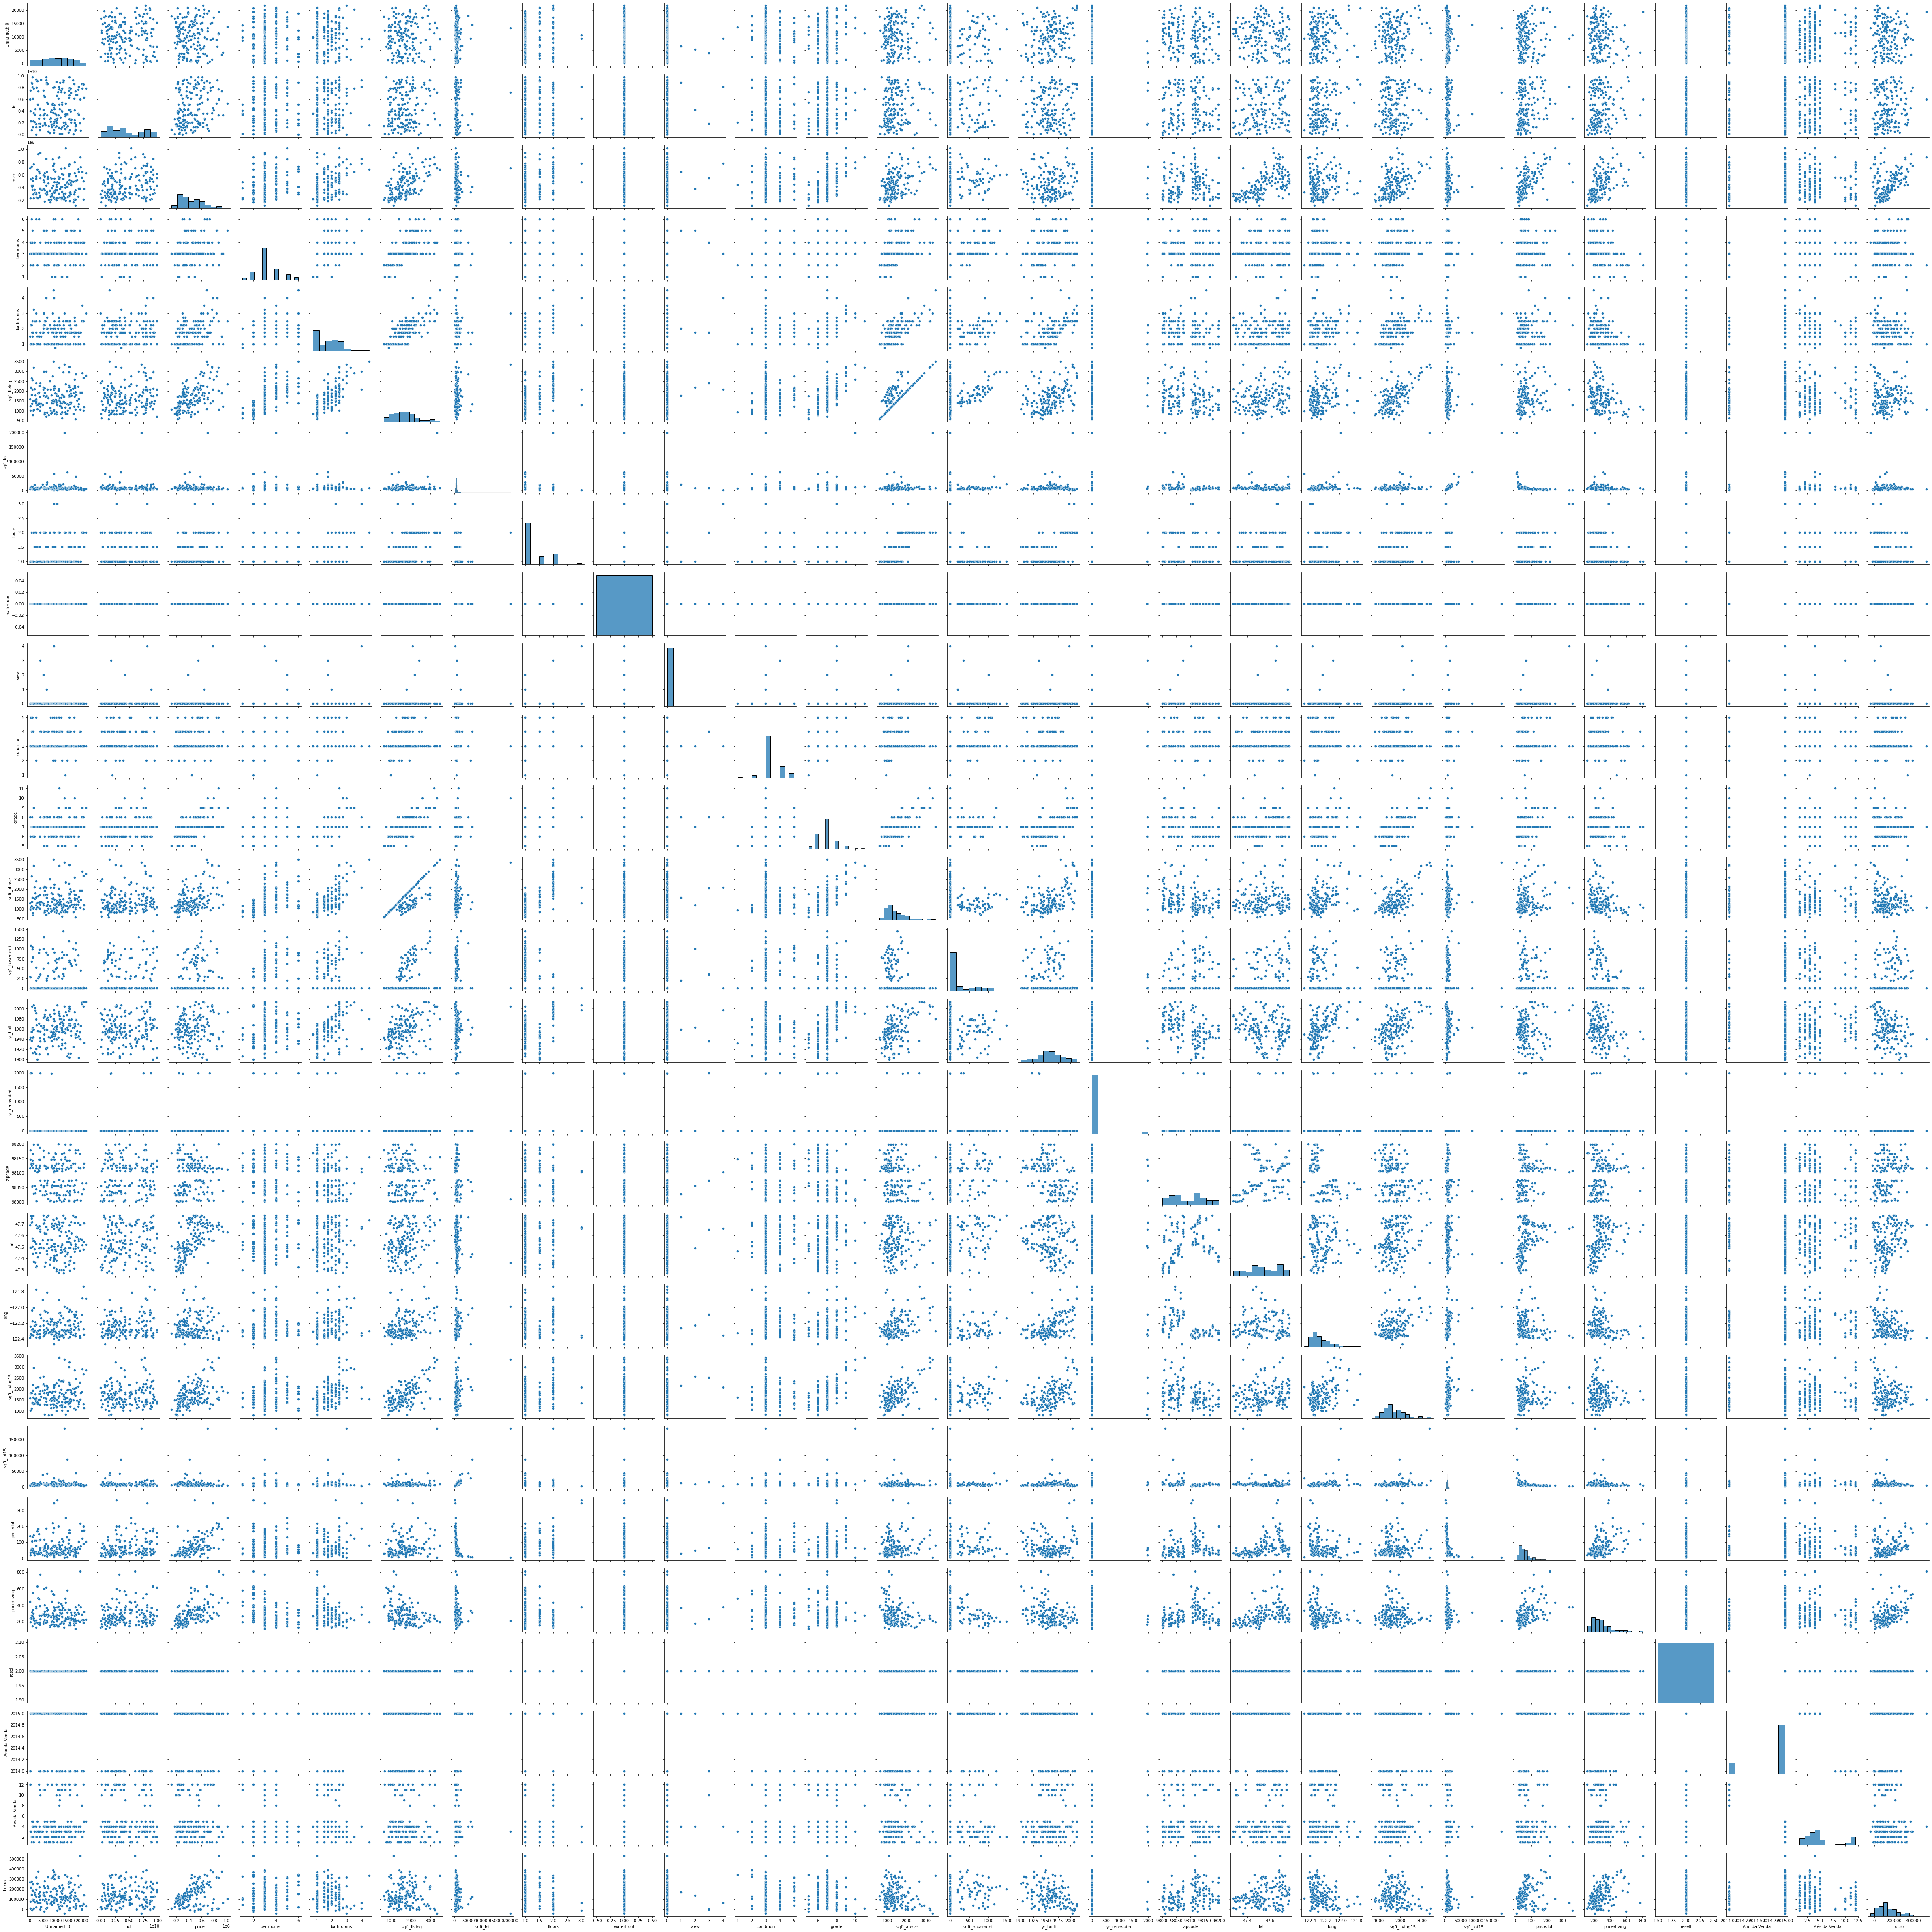

In [44]:
sns.pairplot(df_lucros)
df_lucros.corr()

7.1 Criado o ***df_corr*** removendo as colunas ***id, zipcode, lat, long, Ano da Venda e Mês da Venda***, pois não ajudam na visualização da correlação

In [38]:
df_corr = pd.DataFrame(df_lucro.drop(['id','lat','long','Ano da Venda','Mês da Venda'],axis = 1)).corr()

7.2 Verificando a correlação da coluna ***Lucro*** com as demais colunas.

verificamos valores muito baixos, concluimos que as outras colunas avaliadas exercem pouca influência para a determinação do lucro

In [39]:
df_corr['Lucro']

Unnamed: 0      -0.056062
price           -0.035690
bedrooms         0.058550
bathrooms        0.032573
sqft_living     -0.046471
sqft_lot        -0.059255
floors           0.009311
waterfront            NaN
view            -0.101984
condition       -0.045575
grade            0.002660
sqft_above       0.025296
sqft_basement   -0.118950
yr_built         0.051737
yr_renovated    -0.045095
zipcode         -0.059639
sqft_living15   -0.037765
sqft_lot15      -0.070956
price/lot        0.040947
price/living     0.038856
resell          -0.102707
Lucro            1.000000
Name: Lucro, dtype: float64

7.3 Verificando a correlação da coluna ***price*** com as demais colunas

Verificamos que a coluna  ***sqft_living*** e ***grade*** são as que tem mais correlação para determinar o preço, portanto iremos considera-las quando formos verificar as melhores e as piores opções de investimento 




In [40]:
df_corr['price']

Unnamed: 0       0.031777
price            1.000000
bedrooms         0.296947
bathrooms        0.455867
sqft_living      0.622302
sqft_lot         0.093940
floors           0.273941
waterfront       0.051448
view             0.238262
condition        0.038119
grade            0.631127
sqft_above       0.530426
sqft_basement    0.235668
yr_built         0.061095
yr_renovated     0.083591
zipcode         -0.018387
sqft_living15    0.562044
sqft_lot15       0.082407
price/lot        0.301507
price/living     0.465521
resell          -0.013775
Lucro           -0.035690
Name: price, dtype: float64

#8 Criando um código que usaremos de base para chegarmos a conclusão dos 5 melhores e os 5 piores imóveis para investir  

8.1 Código pegando somente os imóveis vendidos na segunda vez para fazermos algumas analises.

Utilizamos para criar outro dataframe de lucro (***df_lucros***, perceba que o nome se parece com o outro ***df_lucro***, por ter o mesmo dado, porém criado em um código para que possa ser mais manipulável)

In [41]:
venda2 = df[df['resell']==2]
idvenda2 = df[df['resell']==2]['id']
precovenda2 = df[df['resell']==2]['price']

# calculando o lucro
precovenda = list()
lucro = list()
for id in idvenda2:
  precovenda.append(df[df['id']==id]['price'])

#df apenas com o preço quando o imovel foi vendido a segunda vez
df_imven = pd.DataFrame(precovenda).transpose().groupby(level=0, axis=1).sum().copy()

#pegando apenas o valor da coluna preço
lista = df_imven['price'].values.tolist()

#codigo para calcular o lucro
lucro = list()
auxiliar = 0
lista = df_imven['price'].values.tolist()
for x in range(0, len(lista)+1, 2):        
  if x == len(lista):
      break
  else:
      auxiliar = lista[x+1] - lista[x]
      lucro.append(auxiliar)

df_lucros = df[df['resell']==2].copy()

df_lucros['Lucro'] = lucro

In [42]:
display(df_lucros)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
94,94,6021501535,2014-12-23,700000,3,1.50,1580,5000,1.0,0,...,4500,8002,Jones Avenue Northwest,Loyal Heights,140.000000,443.037975,2,2014,12,270000.0
325,325,7520000520,2015-03-11,240500,2,1.00,1240,12092,1.0,0,...,7460,1326,Southwest 120th Street,Mount View,19.889183,193.951613,2,2015,3,8500.0
346,346,3969300030,2014-12-29,239900,4,1.00,1000,7134,1.0,0,...,7138,12646,74th Place South,Seattle,33.627698,239.900000,2,2014,12,74900.0
372,372,2231500030,2015-03-24,530000,4,2.25,2180,10754,1.0,0,...,6929,1301,North 196th Street,Echo Lake,49.283987,243.119266,2,2015,3,215000.0
718,718,8820903380,2015-01-02,730000,6,2.25,2660,13579,2.0,0,...,8242,3910,Northeast 117th Street,Lake City,53.759482,274.436090,2,2015,1,278000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,20181,7853400250,2015-02-19,645000,4,3.50,2910,5260,2.0,0,...,5260,9146,Southeast Nye Street,Eagle Point,122.623574,221.649485,2,2015,2,35000.0
20613,20613,2724049222,2014-12-01,220000,2,2.50,1000,1092,2.0,0,...,1466,4849,South Holly Street,Brighton,201.465201,220.000000,2,2014,12,56200.0
20670,20670,8564860270,2015-03-30,502000,4,2.50,2680,5539,2.0,0,...,5992,Tanner,King County,Washington,90.630078,187.313433,2,2015,3,52010.0
20780,20780,6300000226,2015-05-04,380000,4,1.00,1200,2171,1.5,0,...,1598,10720,Stone Avenue North,Haller Lake,175.034546,316.666667,2,2015,5,140000.0


#9 Fazendo analises levando em conta o ***zipcode***

9.1 Gráficos mostrando a disperção entre a localização e o lucro

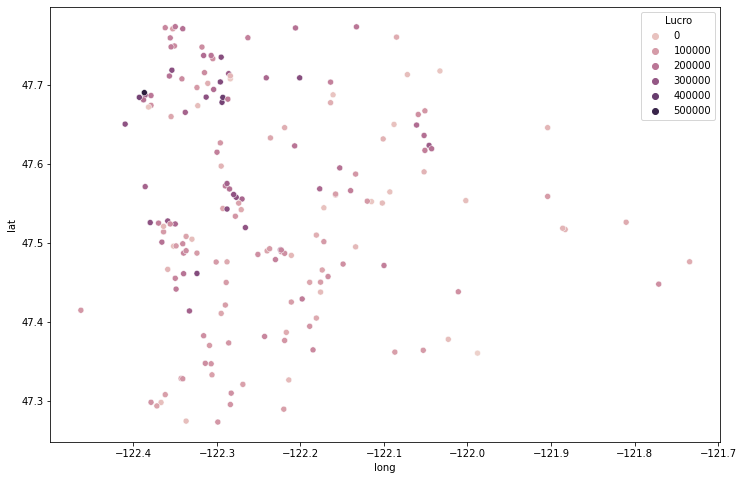

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df_lucro,hue='Lucro')

9.1.2 Gráfico de dispersão, do zipcode dos 5 zip

Localizando o maior lucro e a maior perda

In [45]:
display(df_lucros.sort_values(by=['Lucro'],ascending=True))

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
13299,13299,7167000040,2015-03-05,700000,4,3.00,3350,199253,2.0,0,...,183897,26719,Southeast 271st Street,King County,3.513122,208.955224,2,2015,3,-40000.0
5593,5593,2726049071,2015-04-08,489950,2,1.00,820,4206,1.0,0,...,7200,4034,Northeast 109th Street,Alicia Park,116.488350,597.500000,2,2015,4,-20050.0
10611,10611,2767603612,2015-01-13,489000,2,2.25,1290,1334,3.0,0,...,1334,5900,20th Avenue Northwest,Ballard,366.566717,379.069767,2,2015,1,-11000.0
837,837,8682262400,2015-05-13,419950,2,1.75,1350,4003,1.0,0,...,4479,22841,Northeast 132nd Place,Meadows,104.908818,311.074074,2,2015,5,-10050.0
15278,15278,2619920170,2014-12-19,765000,4,2.50,3230,4290,2.0,0,...,5083,9499,135th Place Northeast,Redmond,178.321678,236.842105,2,2014,12,-7500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9721,9721,2568300045,2015-03-19,649950,6,2.00,1900,8240,1.0,0,...,8240,2825 A,Northeast 105th Street,Alicia Park,78.877427,342.078947,2,2015,3,344950.0
9280,9280,4443800385,2015-05-06,778100,2,1.00,1480,4080,1.0,0,...,4080,7536,28th Avenue Northwest,Loyal Heights,190.710784,525.743243,2,2015,5,368100.0
3299,3299,7409700215,2015-03-13,921500,3,1.50,1900,5000,1.5,0,...,5000,6812,31st Avenue Northeast,Ravenna,184.300000,485.000000,2,2015,3,371500.0
8916,8916,7977201065,2015-03-05,740000,3,1.75,1380,4590,1.0,0,...,4692,7533,33rd Avenue Northeast,Wedgwood,161.220044,536.231884,2,2015,3,390000.0


---

9.2 Calculando a mediana dos lucros por zipcode para descobrir o zipcode com a maior valorização.
Usaremos mediana neste caso, para evirtarmos exceções (valores muito baixos ou muito altos)

Exibindo a mediana pelo zipcode:

In [51]:
df_lucro.groupby('zipcode')['price'].describe().sort_values(by='50%',ascending =False)


,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
98039,6.0,900833.333333,74173.220684,787500.0,867500.0,906250.0,939375.0,1000000.0
98040,165.0,843129.490909,143058.879138,500000.0,743000.0,850000.0,957500.0,1118000.0
98004,154.0,836017.240260,142331.923513,425000.0,728125.0,834500.0,950000.0,1110000.0
98005,153.0,746697.379085,158645.261924,400000.0,620000.0,744500.0,855000.0,1125000.0
98075,330.0,729983.542424,145033.872074,406430.0,629625.0,725393.0,829750.0,1098000.0
...,...,...,...,...,...,...,...,...
98188,136.0,289078.345588,103106.579944,110000.0,228750.0,264000.0,335000.0,707000.0
98001,362.0,280804.690608,98979.230092,100000.0,215000.0,260000.0,319375.0,850000.0
98032,125.0,251296.240000,64705.426452,85000.0,221700.0,249000.0,285000.0,545000.0


9.3 Criado azip, que contém o zipcode de todas as casas que foram vendidas mais de uma vez

In [52]:
azip = list()
for zip in df_lucros['zipcode']:
  if zip not in azip:
    azip.append(zip)
len(azip)

58

9.3.1Relacionamos os 58 zipcodes de areas que identificamos vendas de imovel mais de uma vez (podendo ser analizado o lucro desses imóveis, usamos de base para tirar a mediana de lucro) ***areaszip_lucro***

In [ ]:
areaszip_lucro = list()
for area in azip:
  areaszip_lucro.append(df_lucros[df_lucros['zipcode']==area])
areaszip_lucro

9.3.1.1Lista da mediana dos lucros de cada zipcode que teve revenda

In [ ]:
mediana_lucro = list()
for z,v in enumerate(areaszip_lucro):
  mediana_lucro.append(areaszip_lucro[z]['Lucro'].median())
sorted(mediana_lucro,reverse = True)

9.3.1.2 Criado o dataframe ***df_lucro_idl*** adicionado as colunas ***mediana de lucro*** e ***zipcode*** dessa area

In [79]:
df_lucro_idl = pd.DataFrame(mediana_lucro)
df_lucro_idl['mediana de lucro'] = mediana_lucro
df_lucro_idl['zipcode'] = azip
df_lucro_idl = df_lucro_idl.iloc[:,[1,2]]

9.3.1.3 Mostrando ***zipcode*** com as suas ***medianas de lucro*** ordenadas de forma decrescente

In [82]:
df_lucro_idl.sort_values(by=['mediana de lucro'],ascending=False)

,mediana de lucro,zipcode
50,339500.0,98148
44,313271.0,98199
55,288700.0,98034
0,270000.0,98117
52,257500.0,98116
8,247000.0,98118
17,244500.0,98126
20,227000.0,98115
23,215875.0,98074
29,214250.0,98155


9.3.1.4 Identificando a ***mediana de lucro*** mais alta

In [83]:
df_lucro_idl['mediana de lucro'].max()

339500.0

9.3.1.5 Verificando o zipcode da maior mediana

In [84]:
df_lucro_idl[df_lucro_idl['mediana de lucro']==339500.0]['zipcode']

50    98148
Name: zipcode, dtype: int64

9.3.1.6 criando o dataframe ***df_tops*** usando o zipcode da maior mediana para verificar os imóveis da região, como a amostra é grande resolvemos usar apenas essa area para determinar os melhores investimentos

In [89]:
df_tops = df[df['zipcode']==98148]

9.4 Verificando as casas no ***zipcode*** com o número ***98148***, para identificar as 10 que estão com menor ***price/living*** pois concluímos que seu preço está abaixo da mediana dos preços na região. Sendo possível assim, obter um melhor retorno financeiro na revenda

In [98]:
df_topsp = df_tops.sort_values(by=['price/living']).head(10)

9.5 Ordenando com os melhores ***grade*** para identificar os 5 melhores imóveis para investir.

In [99]:
df_topsp.sort_values(by=['grade'],ascending = False)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda
17871,17871,2923049393,2014-08-13,278000,4,2.25,2400,7738,1.5,0,...,2170,8452,249,South 163rd Place,Five Corners,35.926596,115.833333,1,2014,8
15550,15550,2023049372,2014-11-07,339950,4,2.25,2670,9040,1.0,0,...,1880,2648,Highline,Burien,King County,37.605088,127.322097,1,2014,11
5910,5910,2923049421,2014-07-02,250000,3,2.25,1920,7738,1.0,0,...,2170,8452,249,South 163rd Place,Five Corners,32.308090,130.208333,1,2014,7
9166,9166,2923049399,2015-03-23,315000,3,2.25,2170,8480,1.0,0,...,2080,8452,249,South 163rd Place,Five Corners,37.146226,145.161290,1,2015,3
15442,15442,6121800050,2014-10-29,195000,4,1.50,2170,9948,2.0,0,...,1500,9750,19625,4th Avenue South,North Hill,19.601930,89.861751,1,2014,10
3902,3902,3223049131,2014-10-30,270000,4,2.50,2490,11650,1.0,0,...,2010,10495,18021,2nd Place South,Burien,23.175966,108.433735,1,2014,10
2659,2659,7957600075,2015-04-06,202500,3,1.50,1510,9898,1.0,0,...,1420,9250,167,South 192nd Place,North Hill,20.458679,134.105960,1,2015,4
18586,18586,522049122,2015-04-02,195000,4,1.75,1320,7694,1.0,0,...,1620,8468,19309,8th Avenue South,North Hill,25.344424,147.727273,1,2015,4
19615,19615,7250000065,2014-08-25,338000,3,2.00,2440,23512,1.0,0,...,1630,19613,547,South 160th Street,Five Corners,14.375638,138.524590,1,2014,8
13628,13628,2023049218,2014-07-16,105500,2,1.00,930,7740,1.0,0,...,1620,8584,648,South 159th Street,Five Corners,13.630491,113.440860,1,2014,7




---



#10 Concluímos que esses são os 5 melhores imóveis para investir

In [100]:
top5 = df_topsp.sort_values(by=['grade'],ascending = False).head(5)
top5

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda
17871,17871,2923049393,2014-08-13,278000,4,2.25,2400,7738,1.5,0,...,2170,8452,249,South 163rd Place,Five Corners,35.926596,115.833333,1,2014,8
15550,15550,2023049372,2014-11-07,339950,4,2.25,2670,9040,1.0,0,...,1880,2648,Highline,Burien,King County,37.605088,127.322097,1,2014,11
5910,5910,2923049421,2014-07-02,250000,3,2.25,1920,7738,1.0,0,...,2170,8452,249,South 163rd Place,Five Corners,32.308090,130.208333,1,2014,7
9166,9166,2923049399,2015-03-23,315000,3,2.25,2170,8480,1.0,0,...,2080,8452,249,South 163rd Place,Five Corners,37.146226,145.161290,1,2015,3
15442,15442,6121800050,2014-10-29,195000,4,1.50,2170,9948,2.0,0,...,1500,9750,19625,4th Avenue South,North Hill,19.601930,89.861751,1,2014,10


---

#11 Vericando o zipcode com a menor mediana de lucro

11.1 Mostrando zipcode com as suas medianas de lucro ordenadas de forma crescente

In [104]:
df_lucro_idl.sort_values(by=['mediana de lucro'])

,mediana de lucro,zipcode
49,-40000.0,98010
53,-7500.0,98033
57,0.0,98027
10,8000.0,98029
45,27500.0,98014
46,30750.0,98077
35,35000.0,98065
56,35000.0,98075
28,45000.0,98052
16,51500.0,98002


11.2 Identificando a mediana de lucro mais baixa

In [105]:
df_lucro_idl['mediana de lucro'].min()

-40000.0

11.3 Verificando o zipcode da maior mediana

In [106]:
df_lucro[df_lucro['zipcode']==98010]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
173,173,1762600070,2015-01-16,917500,4,2.50,3880,35003,2.0,0,...,35230,4114,118th Avenue Northeast,Cor-Sun Ranch Estates,26.212039,236.469072,1,2015,1,NaN
185,185,825059270,2014-11-21,1095000,5,3.00,4090,12850,1.0,0,...,10270,6206,114th Avenue Northeast,Kirkland,85.214008,267.726161,1,2014,11,NaN
235,235,1762600320,2014-06-10,1025000,5,4.00,3760,28040,2.0,0,...,35096,4143,118th Avenue Northeast,Cor-Sun Ranch Estates,36.554922,272.606383,1,2014,6,NaN
358,358,325059171,2014-05-05,900000,3,1.00,1330,77972,1.0,0,...,17689,13641,Northeast 100th Street,Redmond,11.542605,676.691729,1,2014,5,NaN
363,363,925059078,2014-08-19,604950,3,2.50,2110,5608,1.0,0,...,9363,7632,116th Avenue Northeast,Kirkland,107.872682,286.706161,1,2014,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21219,21219,9492500010,2014-06-06,879950,4,2.75,3010,7215,2.0,0,...,7215,12134,Northeast 106th Place,Kirkland,121.961192,292.342193,1,2014,6,NaN
21328,21328,1238501184,2014-07-08,999000,4,2.50,3130,10849,2.0,0,...,9131,9006,116th Avenue Northeast,Kirkland,92.082220,319.169329,1,2014,7,NaN
21460,21460,825059349,2014-07-01,1020000,4,3.50,3770,8501,2.0,0,...,9660,104,6th Street South,Kirkland,119.985884,270.557029,1,2014,7,NaN
21465,21465,6400700389,2014-07-10,875000,5,3.00,2960,15152,2.0,0,...,9453,12026,Northeast 70th Street,Snyders Corner,57.748152,295.608108,1,2014,7,NaN


11.4 criando o dataframe df_downs usando o zipcode da mmenor mediana para verificar os imóveis da região, como a amostra é grande resolvemos usar apenas essa area para determinar os piores investimentos

In [116]:
df_downs = df[df['zipcode']==98033]
df_downs

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda
173,173,1762600070,2015-01-16,917500,4,2.50,3880,35003,2.0,0,...,3740,35230,4114,118th Avenue Northeast,Cor-Sun Ranch Estates,26.212039,236.469072,1,2015,1
185,185,825059270,2014-11-21,1095000,5,3.00,4090,12850,1.0,0,...,2540,10270,6206,114th Avenue Northeast,Kirkland,85.214008,267.726161,1,2014,11
235,235,1762600320,2014-06-10,1025000,5,4.00,3760,28040,2.0,0,...,3430,35096,4143,118th Avenue Northeast,Cor-Sun Ranch Estates,36.554922,272.606383,1,2014,6
358,358,325059171,2014-05-05,900000,3,1.00,1330,77972,1.0,0,...,1340,17689,13641,Northeast 100th Street,Redmond,11.542605,676.691729,1,2014,5
363,363,925059078,2014-08-19,604950,3,2.50,2110,5608,1.0,0,...,2040,9363,7632,116th Avenue Northeast,Kirkland,107.872682,286.706161,1,2014,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21219,21219,9492500010,2014-06-06,879950,4,2.75,3010,7215,2.0,0,...,3010,7215,12134,Northeast 106th Place,Kirkland,121.961192,292.342193,1,2014,6
21328,21328,1238501184,2014-07-08,999000,4,2.50,3130,10849,2.0,0,...,2470,9131,9006,116th Avenue Northeast,Kirkland,92.082220,319.169329,1,2014,7
21460,21460,825059349,2014-07-01,1020000,4,3.50,3770,8501,2.0,0,...,1520,9660,104,6th Street South,Kirkland,119.985884,270.557029,1,2014,7
21465,21465,6400700389,2014-07-10,875000,5,3.00,2960,15152,2.0,0,...,1850,9453,12026,Northeast 70th Street,Snyders Corner,57.748152,295.608108,1,2014,7


11.5 Verificando as casas no zipcode com o número ***98033***, para identificar as 30 que estão com maior price/living pois concluímos que seu preço está acima da mediana dos preços na região. Sendo possível assim, obter um pior retorno financeiro na revenda

In [118]:
df_downsp = df_downs.sort_values(by=['price/living'],ascending=False).head(30)
df_downsp

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda
7676,7676,1741700040,2015-01-13,725000,3,1.00,1000,19969,1.0,0,...,1370,7962,535,1st Avenue South,Kirkland,36.306275,725.000000,1,2015,1
3839,3839,3885801450,2015-02-26,830000,2,1.00,1150,6000,1.0,0,...,2450,7200,406,8th Avenue West,Kirkland,138.333333,721.739130,1,2015,2
8831,8831,3885804225,2014-06-24,1010000,2,2.00,1460,9052,1.0,0,...,2554,7834,1302,1st Street,Juanita,111.577552,691.780822,1,2014,6
4358,4358,4151800375,2014-12-04,660000,2,1.00,960,6263,1.0,0,...,1460,6054,6508,103rd Avenue Northeast,Houghton,105.380808,687.500000,1,2014,12
358,358,325059171,2014-05-05,900000,3,1.00,1330,77972,1.0,0,...,1340,17689,13641,Northeast 100th Street,Redmond,11.542605,676.691729,1,2014,5
5503,5503,4151800420,2014-08-15,657500,3,1.75,980,6002,1.0,0,...,1150,6054,10230,Northeast 65th Street,Houghton,109.546818,670.918367,1,2014,8
4765,4765,4151800470,2014-08-20,675000,3,2.00,1010,5973,1.0,0,...,1920,6015,6526,103rd Avenue Northeast,Houghton,113.008538,668.316832,1,2014,8
7967,7967,3885805035,2015-05-08,687500,2,1.00,1040,7200,1.0,0,...,1640,7200,320,9th Avenue,Kirkland,95.486111,661.057692,1,2015,5
15284,15284,3584800010,2015-04-08,550000,3,1.00,880,6664,1.0,0,...,1690,6564,1224,5th Street,Kirkland,82.533013,625.000000,1,2015,4
7606,7606,3885801970,2014-08-12,785000,2,0.75,1260,4800,1.5,0,...,2660,7200,402,10th Avenue West,Kirkland,163.541667,623.015873,1,2014,8


11.6 Ordenando com os piores ***grade*** para identificar os 5 piores imóveis para investir.

In [120]:
down5 = df_downsp.sort_values(by=['grade']).head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda
7606,7606,3885801970,2014-08-12,785000,2,0.75,1260,4800,1.5,0,...,2660,7200,402,10th Avenue West,Kirkland,163.541667,623.015873,1,2014,8
6891,6891,3885803895,2015-03-09,763000,3,2.00,1360,8752,1.0,0,...,2530,7680,123,16th Avenue,Kirkland,87.180073,561.029412,1,2015,3
8831,8831,3885804225,2014-06-24,1010000,2,2.00,1460,9052,1.0,0,...,2554,7834,1302,1st Street,Juanita,111.577552,691.780822,1,2014,6
4358,4358,4151800375,2014-12-04,660000,2,1.00,960,6263,1.0,0,...,1460,6054,6508,103rd Avenue Northeast,Houghton,105.380808,687.500000,1,2014,12
5503,5503,4151800420,2014-08-15,657500,3,1.75,980,6002,1.0,0,...,1150,6054,10230,Northeast 65th Street,Houghton,109.546818,670.918367,1,2014,8


#12 Concluímos que esses são os 5 melhores imóveis para investir

In [121]:
down5

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda
7606,7606,3885801970,2014-08-12,785000,2,0.75,1260,4800,1.5,0,...,2660,7200,402,10th Avenue West,Kirkland,163.541667,623.015873,1,2014,8
6891,6891,3885803895,2015-03-09,763000,3,2.00,1360,8752,1.0,0,...,2530,7680,123,16th Avenue,Kirkland,87.180073,561.029412,1,2015,3
8831,8831,3885804225,2014-06-24,1010000,2,2.00,1460,9052,1.0,0,...,2554,7834,1302,1st Street,Juanita,111.577552,691.780822,1,2014,6
4358,4358,4151800375,2014-12-04,660000,2,1.00,960,6263,1.0,0,...,1460,6054,6508,103rd Avenue Northeast,Houghton,105.380808,687.500000,1,2014,12
5503,5503,4151800420,2014-08-15,657500,3,1.75,980,6002,1.0,0,...,1150,6054,10230,Northeast 65th Street,Houghton,109.546818,670.918367,1,2014,8


#O que falta corrigir e fazer 
##Os lucros não estão concisos (fiz de duas formas com os codigos das Andreia/Alessa e teve o msmo resultado)
##***Correlações com o lucro ficaram bem baixas(discutir as razões) as outras colunas usadas para a correlação provavelmente não exercem nenhuma alteração para o lucro ou estamos com algum erro.***
#verificar com as colunas não numericas ou que foram removidas 
#o grafico de disperção parece ser mais significativo, verificar a importancia do local para a valorização e desvalorização do imóvel
#verificar a média do preço da area para achar casas abaixo do preço para verificar casas com maiores lucros
#descobrir a conclusao do projeto
# explicar detalhadamente como chegamos a conclusao que sao as 5 melhores e as 5 piores
#completar o relatorio do arquivo word miniprojeto_roofimoveis
#na descrição do deliverable está que precisa ser feito em formato do crispy-Dm, verificar alguma necessidade de adequação ou não
#é disponibilizado um power point para completarmos com o nosso deliverable< verificar a necessidade de utilizar ou não